## Keras Regression Example

This notebook uses the Beijing PM2.5 data set from the [UCI ML Repository](http://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data)

The PM2.5 column is the target. PM2.5 is a measure of particulate matter (PM) with a diameter of less than 2.5 micrometers, about 3% the diameter of a human hair. 

The columns that can be used to predict this pollution level are day and time information, dewpoint, temperature, atmospheric pressure, combined wind direction (later converted to categorical), cumulative wind speed, snow and rain. 

### First import the data into Google Colab

* upload the data
* convert it to a pandas data frame
* drop the number "No" column
* convert wind direction to categorical
* print the shape and first few rows


In [1]:
from google.colab import files
uploaded = files.upload()

Saving PRSA_data.csv to PRSA_data.csv


In [52]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['PRSA_data.csv']))
df = df.dropna()
df = df.drop(columns=['No'])
df.cbwd = df.cbwd.astype('category').cat.codes
print("Dimensions of data:", df.shape)
df.head()


Dimensions of data: (41757, 12)


,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,2010,1,2,0,129.0,-16,-4.0,1020.0,2,1.79,0,0
25,2010,1,2,1,148.0,-15,-4.0,1020.0,2,2.68,0,0
26,2010,1,2,2,159.0,-11,-5.0,1021.0,2,3.57,0,0
27,2010,1,2,3,181.0,-7,-5.0,1022.0,2,5.36,1,0
28,2010,1,2,4,138.0,-7,-5.0,1022.0,2,6.25,2,0


# Train/Test split

* 80/20 train/test split
* 33K observations in train
* 8K observations in test

In [68]:
# train test split
from sklearn.model_selection import train_test_split

X = df.drop('pm2.5', axis=1)
y = df['pm2.5']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (33405, 11)
Test shape: (8352, 11)


## Linear Regression

The linear regression model achieved an MSE of about 79.

In [69]:
# train the algorithm
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
# test
pred = linreg.predict(X_test)

# evaluate
from sklearn.metrics import mean_squared_error, r2_score
import math
print('rmse=', math.sqrt(mean_squared_error(y_test, pred)))
print('correlation=', r2_score(y_test, pred))

rmse= 78.86970770480497
correlation= 0.26676373644404916



Scale the data

In [0]:
# scale the data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Now try Keras

In [0]:
from __future__ import print_function

from keras import models
from keras import layers
from keras.optimizers import RMSprop

batch_size = 128
epochs = 100

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(11,)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1))

In [0]:
model.compile(loss='mse',
              optimizer=RMSprop(),
              metrics=['mae'])

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(X_test, y_test))

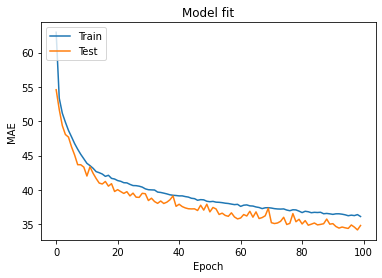

In [74]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model fit')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [76]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test rmse:', math.sqrt(score[0]))
print('Test mae:', score[1])

Test rmse: 52.68481547548495
Test mae: 34.79683303833008


Is this a good result? Looking at the target column statistics below, the range is almost 900 and the standard deviation is 92, so being off an average of 34 is not bad.

In [28]:
df['pm2.5'].describe()

count    41757.000000
mean        98.613215
std         92.050387
min          0.000000
25%         29.000000
50%         72.000000
75%        137.000000
max        994.000000
Name: pm2.5, dtype: float64